<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_15/PCW_Session_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Discrete random walk

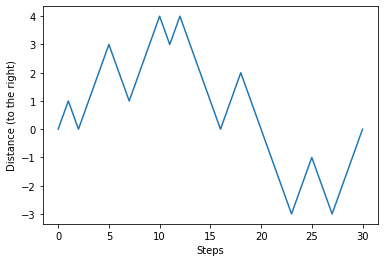

None


In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



class Coin:
    HEAD = "head"
    TAIL = "tail"
    def __init__(self, p_head, special_condition = None):
        self.p_head = p_head
        self.special_condition = special_condition
    
    def toss_coin(self):
        return self.HEAD if random.random() < self.p_head else self.TAIL


    def random_walk(self, steps):
        dist_arr = [0]
        dist = 0
        for i in range(steps):
            if self.toss_coin() == self.HEAD:
                dist_arr.append(dist_arr[-1] + 1)
                dist += 1
            else:
                dist_arr.append(dist_arr[-1] - 1)
                dist -= 1
            if self.special_condition is None:
                continue
            dist_arr, dist = self.special_condition(dist_arr, dist)
            

        return dist_arr, dist

    def plot_random_walk(self, steps):
        dist_arr, final_dist = self.random_walk(steps)
        plt.plot(dist_arr)
        plt.xlabel("Steps")
        plt.ylabel("Distance (to the right)")
        plt.show()
        



def reflection_barrier(dist_arr, dist):
    if dist == -4:
        dist_arr.append(-3)
        dist = -3
    return dist_arr, dist

def partial_block(dist_arr, dist):
    if dist == 6:
        if random.random() < 0.75:
            dist = 5
            dist_arr.append(5)
        else:
            dist = 7
            dist_arr.append(7)
    return dist_arr, dist

coin = Coin(0.5, special_condition = reflection_barrier)
print(coin.plot_random_walk(30))


In [31]:
def sample(n = 10000, steps = 100, p_head = 0.5, special_condition = None):
    coin = Coin(p_head, special_condition)
    distance_arr = []
    for rep in range(n):
        dist = coin.random_walk(steps)[1]
        distance_arr.append(dist)
    
    mean = np.mean(distance_arr)
    var = np.var(distance_arr)
    plt.hist(distance_arr)
    
    plt.title(f"Histogram of final locations")
    plt.ylabel("Frequency")
    plt.xlabel("Distance")
    plt.show()

    return mean, var

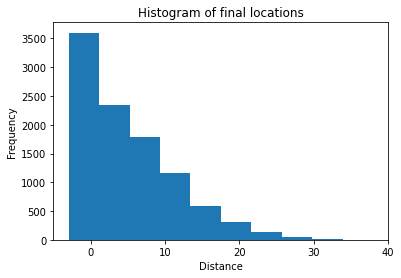

(4.9708, 41.19894736)

In [32]:
sample(special_condition = reflection_barrier)


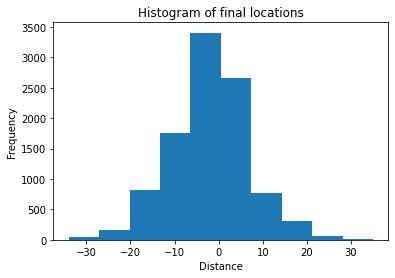

(-2.0877, 77.08240871000001)

In [33]:
sample(special_condition = partial_block)

## Gaussian random walk

In [3]:
from numpy.random import normal


lmbda = 0.1
sigma = 0.3
S0 = 100
T = 90

def gaussian_random_walk(lmbda, sigma, S0, T):
    S = S0
    t_change = 1/365
    for i in range(T):
        W_change = normal(0, t_change ** 0.5)
        S += S * (lmbda * t_change + sigma * W_change)

    return S

In [13]:
def sample_gaussian(trials = 10000, lmbda = lmbda, sigma = sigma, S0 = S0, T = T):
    prices = []
    log_prices = []
    for _ in range(trials):
        price = gaussian_random_walk(lmbda, sigma, S0, T)
        prices.append(price)
        log_prices.append(np.log10(price))

    plt.hist(prices)
    plt.xlabel("Final price")
    plt.ylabel("Frequency")
    plt.title(f"Price distribution after {T} days with starting price {S0}")
    plt.show()

    plt.hist(log_prices)
    plt.xlabel("Base 10 of Final price")
    plt.ylabel("Frequency")
    plt.title(f"Logarithmic distribution of prices after {T} days with starting price {S0}")
    plt.show()

    return np.mean(prices), np.std(prices)

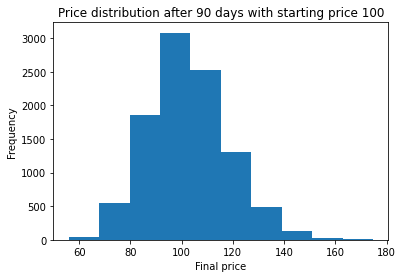

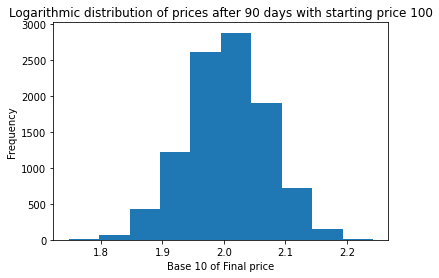

(102.50586541983134, 15.408974864213645)

In [14]:
sample_gaussian()

Hmm they both look pretty normally distributed to me?

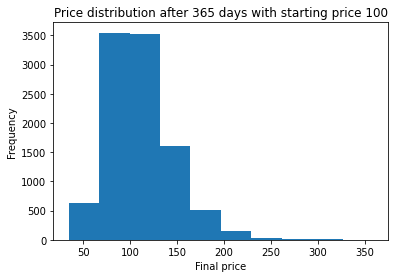

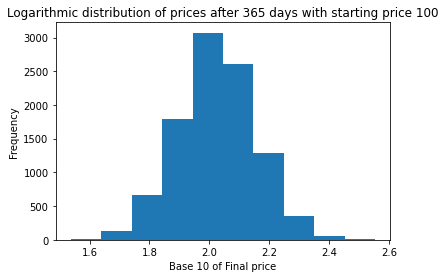

(110.5191676272792, 33.88781688902901)

In [15]:
#testing with 365 days
sample_gaussian(T = 365)

## Diffusion in the plane

In [37]:
square_holes_set = set([(13, 7), (14, 7), (14, 8), (13, 8)])
size = [20, 20]

def black_hole(square_holes_set, size, steps, repeats):
    final = []
    square_holes = 0
    boundaries = 0
    potential_moves = [(0, 1), (1, 0), (-1, 0), (0, -1)]

    for _ in range(repeats):
        x, y = 0, 0
        for _ in range(steps):
            dx, dy = random.choice(potential_moves)
            x, y = x + dx, y + dy
            if (x, y) in square_holes_set:
                square_holes += 1
                break
            if abs(x) > size[0] or abs(y) > size[1]:
                boundaries += 1
                break
        final.append((x, y))
    
    return final, square_holes, boundaries


        
                






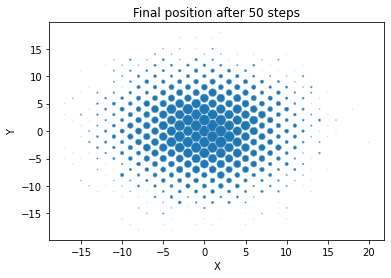

Fraction that enters the hole = 0.0007
Fraction that ends at the boundary = 0.0


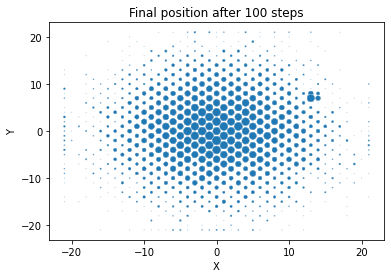

Fraction that enters the hole = 0.011
Fraction that ends at the boundary = 0.013


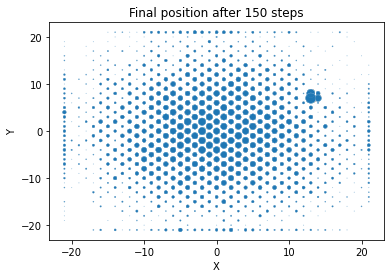

Fraction that enters the hole = 0.0233
Fraction that ends at the boundary = 0.0553


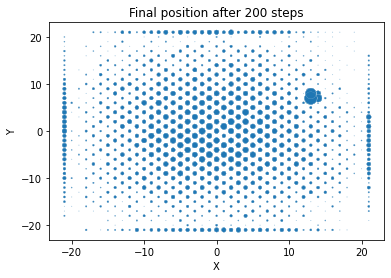

Fraction that enters the hole = 0.0364
Fraction that ends at the boundary = 0.131


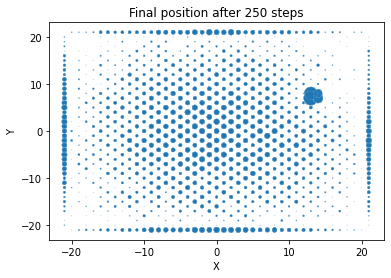

Fraction that enters the hole = 0.0536
Fraction that ends at the boundary = 0.2137


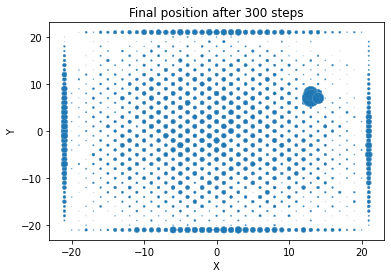

Fraction that enters the hole = 0.0688
Fraction that ends at the boundary = 0.295


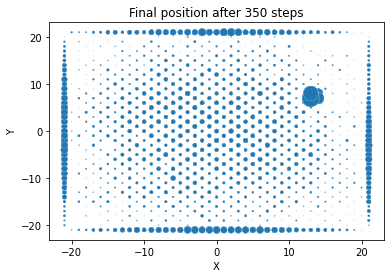

Fraction that enters the hole = 0.0752
Fraction that ends at the boundary = 0.3774


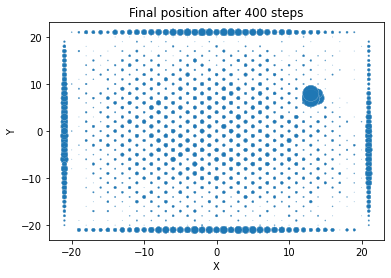

Fraction that enters the hole = 0.0796
Fraction that ends at the boundary = 0.4298


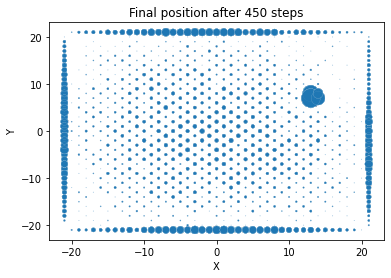

Fraction that enters the hole = 0.0915
Fraction that ends at the boundary = 0.5014


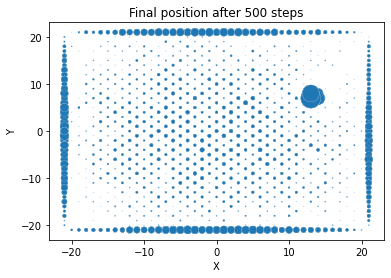

Fraction that enters the hole = 0.0966
Fraction that ends at the boundary = 0.5516


In [39]:
repeats = 10000
from collections import Counter
import pandas as pd

for step in range(50, 501, 50):
    final, square_holes, boundaries = black_hole(square_holes_set, size, step, repeats)
    xs = [val[0] for val in final]
    ys = [val[1] for val in final]
    freq = Counter(final)
    weight = [freq[val] for val in final]
    
    sns.scatterplot(x = xs, y = ys, s = weight, alpha = 0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Final position after {step} steps")
    plt.show()
    print(f"Fraction that enters the hole = {square_holes/ repeats}")
    print(f"Fraction that ends at the boundary = {boundaries / repeats}")